# Building Neural Networks with PyTorch

# Setup

This project requires Python 3.10 or above:

In [1]:
import sys

assert sys.version_info >= (3, 10)

It also requires Scikit-Learn ≥ 1.6.1:

In [2]:
from packaging.version import Version
import sklearn

assert Version(sklearn.__version__) >= Version("1.6.1")

In [3]:
## %pip install -q optuna torchmetrics

And of course we need PyTorch, specifically PyTorch ≥ 2.6.0:

In [4]:
import torch

assert Version(torch.__version__) >= Version("2.6.0")

Let's define the default font sizes to make the figures prettier:

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# PyTorch Fundamentals
## PyTorch Tensors

In [18]:
X = ([[1.0, 4.0, 7.0], [2.0, 3.0, 6.0]])

X

[[1.0, 4.0, 7.0], [2.0, 3.0, 6.0]]

In [19]:
X.shape

AttributeError: 'list' object has no attribute 'shape'

In [20]:
import torch

X = torch.tensor([[1.0, 4.0, 7.0], [2.0, 3.0, 6.0]])
X

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [21]:
X.shape

torch.Size([2, 3])

In [22]:
X.dtype

torch.float32

In [ ]:
X[0, 1] # X[row, column]

tensor(4.)

In [25]:
X[:, 1]

tensor([4., 3.])

In [26]:
10 * (X + 1.0)  # item-wise addition and multiplication

tensor([[20., 50., 80.],
        [30., 40., 70.]])

In [27]:
X.exp()

tensor([[   2.7183,   54.5981, 1096.6332],
        [   7.3891,   20.0855,  403.4288]])

In [28]:
X.mean()

tensor(3.8333)

In [29]:
X.flatten()

tensor([1., 4., 7., 2., 3., 6.])

In [31]:
Mean_Test = (1.0 + 4.0 + 7.0 + 2.0 + 3.0 + 6.0) / 6
Mean_Test

3.8333333333333335

In [39]:
X.sum() / len(X.flatten())

tensor(3.8333)

In [44]:
X.max(dim=0), X.shape # 0 ---> each column value maximum, 1 ---> each row value maximum

(torch.return_types.max(
 values=tensor([2., 4., 7.]),
 indices=tensor([1, 0, 0])),
 torch.Size([2, 3]))

In [45]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]])

In [ ]:
import numpy as np

X.numpy() # we convert torch into numpy

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [ ]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]])) # we can also convert numpy into torch tensor

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

In [48]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]), dtype=torch.float32)

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [49]:
torch.FloatTensor(np.array([[1., 4., 7.], [2., 3., 6]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [53]:
# Create a NumPy array
X2_np = np.array([[1., 4., 7.], [2., 3., 6]])

# Convert NumPy array to PyTorch tensor WITHOUT copying memory
# Both X2_np and X2 point to the same underlying data
X2 = torch.from_numpy(X2_np)

# Modify the NumPy array
# This change will also appear in the tensor because memory is shared
X2_np[0, 1] = 88

# Printing X2 will reflect the updated value (88)
X2

tensor([[ 1., 88.,  7.],
        [ 2.,  3.,  6.]], dtype=torch.float64)

In [54]:
X[:, 1] = -99
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]])

In [55]:
# Apply ReLU activation IN-PLACE
# ReLU replaces all negative values with 0 and keeps positive values unchanged
# The underscore (_) means the tensor X is modified directly (no new tensor created)
X.relu_()

# X now contains the updated values after ReLU
X

tensor([[1., 0., 7.],
        [2., 0., 6.]])

PyTorch tensors really resemble NumPy arrays. In fact, they have over 200 common functions!

In [56]:
# extra code: list functions that appear both in NumPy and PyTorch
functions = lambda mod: set(f for f in dir(mod) if callable(getattr(mod, f)))
", ".join(sorted(functions(torch) & functions(np)))

'__getattr__, abs, absolute, acos, acosh, add, all, allclose, amax, amin, angle, any, arange, arccos, arccosh, arcsin, arcsinh, arctan, arctan2, arctanh, argmax, argmin, argsort, argwhere, asarray, asin, asinh, atan, atan2, atanh, atleast_1d, atleast_2d, atleast_3d, bincount, bitwise_and, bitwise_left_shift, bitwise_not, bitwise_or, bitwise_right_shift, bitwise_xor, broadcast_shapes, broadcast_to, can_cast, ceil, clip, column_stack, concat, concatenate, conj, copysign, corrcoef, cos, cosh, count_nonzero, cov, cross, cumprod, cumsum, deg2rad, diag, diagflat, diagonal, diff, divide, dot, dsplit, dstack, dtype, einsum, empty, empty_like, equal, exp, exp2, expm1, eye, finfo, fix, flip, fliplr, flipud, float_power, floor, floor_divide, fmax, fmin, fmod, frexp, from_dlpack, frombuffer, full, full_like, gcd, gradient, greater, greater_equal, heaviside, histogram, histogramdd, hsplit, hstack, hypot, i0, iinfo, imag, inner, isclose, isfinite, isin, isinf, isnan, isneginf, isposinf, isreal, kron

## Hardware Acceleration

In [57]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

device

'cuda'

In [58]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
M = M.to(device)
M.device

device(type='cuda', index=0)

In [59]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

In [60]:
R = M @ M.T  # run some operations on the GPU
R

tensor([[14., 32.],
        [32., 77.]], device='cuda:0')

In [61]:
M = torch.rand((1000, 1000))  # on the CPU
M @ M.T  # warmup
%timeit M @ M.T

M = M.to(device)
M @ M.T  # warmup
%timeit M @ M.T

6.08 ms ± 47 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
570 μs ± 10.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Autograd

Consider a simple function, $f(x) = x^2$.
Calculus tells us that the derivative of this function is $f'(x)=2x$. Let's evaluate $f(5)$ and the derivative $f'(5)$ using autograd. We expect to find $f(5)=5^2=25$ and $f'(5)=2*5=10$. Let's see!

In [123]:
x = torch.tensor(5.0, requires_grad=True)
f = x ** 2
f

tensor(25., grad_fn=<PowBackward0>)

In [124]:
f.backward() # backpropagation
x.grad

tensor(10.)

In [125]:
x, f

(tensor(5., requires_grad=True), tensor(25., grad_fn=<PowBackward0>))

This is the core idea: **move parameters in the opposite direction of the gradient to reduce loss.**

---

* `x` → parameter
* `x.grad` → gradient (computed by autograd)
* `learning_rate`
* subtraction → moving downhill on the loss surface

`torch.no_grad()` is the practical addition — it prevents PyTorch from tracking the update itself in the computation graph.

In [ ]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad  # gradient descent step 
   #5 -= 0.1 * 10

In [128]:
x

tensor(4., requires_grad=True)

Alternatively, we could have used this code for the gradient descent step (but using `no_grad()` is more common for this):

In [129]:
x_detached = x.detach()
x_detached -= learning_rate * x.grad

In [130]:
x

tensor(3., requires_grad=True)

In [131]:
x.grad.zero_()

tensor(0.)

Let's put everything together to get our training loop:

In [147]:
learning_rate = 0.1
x = torch.tensor(5.0, requires_grad=True)
print("-----------------")
for iteration in range(10):
    f = x ** 2  # forward pass
    f.backward()  # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad  # gradient descent step
    print(x.grad)
    print(x)
    print("-----------------")
    x.grad.zero_()  # reset the gradients, it clear accumulated gradients so each iteration uses only the current gradient

-----------------
tensor(10.)
tensor(4., requires_grad=True)
-----------------
tensor(8.)
tensor(3.2000, requires_grad=True)
-----------------
tensor(6.4000)
tensor(2.5600, requires_grad=True)
-----------------
tensor(5.1200)
tensor(2.0480, requires_grad=True)
-----------------
tensor(4.0960)
tensor(1.6384, requires_grad=True)
-----------------
tensor(3.2768)
tensor(1.3107, requires_grad=True)
-----------------
tensor(2.6214)
tensor(1.0486, requires_grad=True)
-----------------
tensor(2.0972)
tensor(0.8389, requires_grad=True)
-----------------
tensor(1.6777)
tensor(0.6711, requires_grad=True)
-----------------
tensor(1.3422)
tensor(0.5369, requires_grad=True)
-----------------


The variable `x` gets pushed towards 0, since that's the value that minimizes $f(x) = x^2$:

In [133]:
x

tensor(1.0185e-09, requires_grad=True)

# Implementing Linear Regression
## Linear Regression Using Tensors & Autograd

In [163]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [164]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [165]:
import pandas as pd

# convert features to dataframe
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])

# add target column
housing_df['MedHouseVal'] = housing['target']

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [166]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)

X_train.dtype

torch.float32

In [167]:
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)

means, stds

(tensor([[ 3.8918e+00,  2.8625e+01,  5.4559e+00,  1.0996e+00,  1.4243e+03,
           2.9589e+00,  3.5646e+01, -1.1958e+02]]),
 tensor([[1.9094e+00, 1.2641e+01, 2.5505e+00, 4.6548e-01, 1.0958e+03, 2.3615e+00,
          2.1347e+00, 2.0010e+00]]))

In [168]:
# standardization (z-score normalization)

X_train = (X_train - means) / stds
X_valid = (X_valid - means) / stds
X_test = (X_test - means) / stds

X_train

tensor([[-0.1940, -1.0778, -0.9433,  ..., -0.5729,  0.9292, -1.4221],
        [ 0.7520, -1.8688,  0.4055,  ...,  0.2052, -0.9165,  1.0966],
        [-0.4147,  0.0297,  0.8181,  ..., -0.2998,  1.3087, -1.6970],
        ...,
        [-1.2233,  0.5043, -0.5160,  ...,  0.1345, -0.7198,  1.1466],
        [-0.9355,  1.8491, -0.1088,  ..., -0.0135,  0.5217, -0.1028],
        [ 0.8958,  0.1879,  0.2995,  ..., -0.1782,  1.1213, -1.3071]])

In [169]:
X_train.shape, y_train.shape

(torch.Size([11610, 8]), (11610,))

PyTorch expects the targets to have one row per sample, so let's reshape the targets to be column vectors:

In [170]:
y_train = torch.FloatTensor(y_train).view(-1, 1)
y_valid = torch.FloatTensor(y_valid).view(-1, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

In [171]:
y_train.shape

torch.Size([11610, 1])

In [172]:
torch.manual_seed(42)
n_features = X_train.shape[1]  # there are 8 input features

n_features

8

In [173]:
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

w, b

(tensor([[ 0.3367],
         [ 0.1288],
         [ 0.2345],
         [ 0.2303],
         [-1.1229],
         [-0.1863],
         [ 2.2082],
         [-0.6380]], requires_grad=True),
 tensor(0., requires_grad=True))

**Note**: in the next section, we will build an almost identical model using PyTorch's high-level API. Its results will be slightly different because it will use a different parameter initialization method: it will use a uniform random distribution from $-\frac{1}{2\sqrt 2}$ to $+\frac{1}{2\sqrt 2}$ to initialize both the weights and the bias term. If you want to get exactly the same result here as in the next section, you can uncomment and run the initialization code in the following cell, instead of the code in the previous cell:

In [174]:
# torch.manual_seed(42)
# n_features = X_train.shape[1]  # there are 8 input features
# r = 2 ** -1.5  # this is equal to 1 / 2√2
# w = torch.empty(n_features, 1).uniform_(-r, r)
# b = torch.empty(1).uniform_(-r, r)
# w.requires_grad_(True)
# b.requires_grad_(True)

In [175]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
    y_pred = X_train @ w + b
    loss = ((y_pred - y_train) ** 2).mean()
    loss.backward()
    with torch.no_grad():
        b -= learning_rate * b.grad
        w -= learning_rate * w.grad
        b.grad.zero_()
        w.grad.zero_()
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

Epoch 1/20, Loss: 16.158456802368164
Epoch 2/20, Loss: 4.879366397857666
Epoch 3/20, Loss: 2.2552270889282227
Epoch 4/20, Loss: 1.3307628631591797
Epoch 5/20, Loss: 0.9680694937705994
Epoch 6/20, Loss: 0.8142679929733276
Epoch 7/20, Loss: 0.7417047023773193
Epoch 8/20, Loss: 0.7020702362060547
Epoch 9/20, Loss: 0.6765919923782349
Epoch 10/20, Loss: 0.6577966213226318
Epoch 11/20, Loss: 0.6426153182983398
Epoch 12/20, Loss: 0.6297224760055542
Epoch 13/20, Loss: 0.6184942722320557
Epoch 14/20, Loss: 0.608596920967102
Epoch 15/20, Loss: 0.5998217463493347
Epoch 16/20, Loss: 0.5920187830924988
Epoch 17/20, Loss: 0.5850691795349121
Epoch 18/20, Loss: 0.578873336315155
Epoch 19/20, Loss: 0.573345422744751
Epoch 20/20, Loss: 0.5684100985527039


In [176]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = X_new @ w + b  # use the trained parameters to make predictions

In [177]:
y_pred

tensor([[0.8916],
        [1.6480],
        [2.6577]])

## Linear Regression Using PyTorch's High-Level API

In [178]:
import torch.nn as nn

torch.manual_seed(42)  # to get reproducible results
model = nn.Linear(in_features=n_features, out_features=1)

In [179]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [180]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [181]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


In [182]:
model(X_train[:2])

tensor([[-0.4718],
        [ 0.1131]], grad_fn=<AddmmBackward0>)

In [183]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

In [184]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
    for epoch in range(n_epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

In [185]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.3378496170043945
Epoch 2/20, Loss: 0.780293345451355
Epoch 3/20, Loss: 0.6253840327262878
Epoch 4/20, Loss: 0.6060433387756348
Epoch 5/20, Loss: 0.5956299304962158
Epoch 6/20, Loss: 0.5873566269874573
Epoch 7/20, Loss: 0.5802990198135376
Epoch 8/20, Loss: 0.5741382241249084
Epoch 9/20, Loss: 0.5687100887298584
Epoch 10/20, Loss: 0.5639079213142395
Epoch 11/20, Loss: 0.5596510767936707
Epoch 12/20, Loss: 0.5558737516403198
Epoch 13/20, Loss: 0.5525193810462952
Epoch 14/20, Loss: 0.5495391488075256
Epoch 15/20, Loss: 0.5468899011611938
Epoch 16/20, Loss: 0.544533908367157
Epoch 17/20, Loss: 0.5424376130104065
Epoch 18/20, Loss: 0.5405715703964233
Epoch 19/20, Loss: 0.5389096736907959
Epoch 20/20, Loss: 0.5374288558959961


In [186]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = model(X_new)  # use the trained model to make predictions

y_pred

tensor([[0.8061],
        [1.7116],
        [2.6973]])

# Implementing a Regression MLP

In [193]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

In [188]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 5.045480251312256
Epoch 2/20, Loss: 2.0523128509521484
Epoch 3/20, Loss: 1.0039883852005005
Epoch 4/20, Loss: 0.8570139408111572
Epoch 5/20, Loss: 0.7740675210952759
Epoch 6/20, Loss: 0.7225848436355591
Epoch 7/20, Loss: 0.6893726587295532
Epoch 8/20, Loss: 0.6669033765792847
Epoch 9/20, Loss: 0.6507738828659058
Epoch 10/20, Loss: 0.6383934617042542
Epoch 11/20, Loss: 0.6281994581222534
Epoch 12/20, Loss: 0.6193399429321289
Epoch 13/20, Loss: 0.6113173365592957
Epoch 14/20, Loss: 0.6038705706596375
Epoch 15/20, Loss: 0.5968308448791504
Epoch 16/20, Loss: 0.5901119112968445
Epoch 17/20, Loss: 0.5836468935012817
Epoch 18/20, Loss: 0.5774064064025879
Epoch 19/20, Loss: 0.5713555216789246
Epoch 20/20, Loss: 0.565444827079773


# Implementing Mini-Batch Gradient Descent using DataLoaders

In [204]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [205]:
# extra code – build the model just like earlier
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 1)
)

model = model.to(device)

# extra code – build the optimizer and loss function, as earlier
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()

In [206]:
def train(model, optimizer, criterion, train_loader, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        total_loss = 0.
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            #print(X_batch.shape)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        mean_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {mean_loss:.4f}")

In [207]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss: 0.5900
Epoch 2/20, Loss: 0.4046
Epoch 3/20, Loss: 0.3801
Epoch 4/20, Loss: 0.3629
Epoch 5/20, Loss: 0.3529
Epoch 6/20, Loss: 0.3520
Epoch 7/20, Loss: 0.3408
Epoch 8/20, Loss: 0.3426
Epoch 9/20, Loss: 0.3407
Epoch 10/20, Loss: 0.3378
Epoch 11/20, Loss: 0.3304
Epoch 12/20, Loss: 0.3267
Epoch 13/20, Loss: 0.3244
Epoch 14/20, Loss: 0.3221
Epoch 15/20, Loss: 0.3188
Epoch 16/20, Loss: 0.3148
Epoch 17/20, Loss: 0.3122
Epoch 18/20, Loss: 0.3111
Epoch 19/20, Loss: 0.3086
Epoch 20/20, Loss: 0.3087


# Model Evaluation

In [215]:
def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
    model.eval()  # switch model to evaluation mode (disables dropout, uses batchnorm running stats)
    metrics = []
    with torch.no_grad():  # disable gradient tracking to save memory and computation
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # move data to CPU/GPU
            y_pred = model(X_batch)  # forward pass
            metric = metric_fn(y_pred, y_batch)  # compute batch metric (e.g., MSE/RMSE)
            #print(metric)
            metrics.append(metric)  # store metric for aggregation
    return aggregate_fn(torch.stack(metrics))  # combine all batch metrics into final score

In [216]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.4160, device='cuda:0')

In [217]:
def rmse(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean().sqrt()

evaluate(model, valid_loader, rmse)

tensor(0.5687, device='cuda:0')

In [218]:
valid_mse.sqrt()

tensor(0.6450, device='cuda:0')

In [219]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.6450, device='cuda:0')

In [220]:
import torchmetrics

def evaluate_tm(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

In [221]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.6450, device='cuda:0')

Epoch 1/20, train loss: 0.7826, train metric: 0.8847, valid metric: 0.6690
Epoch 2/20, train loss: 0.4362, train metric: 0.6605, valid metric: 0.6099
Epoch 3/20, train loss: 0.3930, train metric: 0.6269, valid metric: 0.6145
Epoch 4/20, train loss: 0.3759, train metric: 0.6132, valid metric: 0.5963
Epoch 5/20, train loss: 0.3649, train metric: 0.6040, valid metric: 0.5911
Epoch 6/20, train loss: 0.3598, train metric: 0.5999, valid metric: 0.5965
Epoch 7/20, train loss: 0.3530, train metric: 0.5941, valid metric: 0.6062
Epoch 8/20, train loss: 0.3495, train metric: 0.5911, valid metric: 0.6043
Epoch 9/20, train loss: 0.3454, train metric: 0.5877, valid metric: 0.5723
Epoch 10/20, train loss: 0.3416, train metric: 0.5845, valid metric: 0.6037
Epoch 11/20, train loss: 0.3400, train metric: 0.5830, valid metric: 0.5880
Epoch 12/20, train loss: 0.3362, train metric: 0.5799, valid metric: 0.5738
Epoch 13/20, train loss: 0.3352, train metric: 0.5788, valid metric: 0.5881
Epoch 14/20, train lo

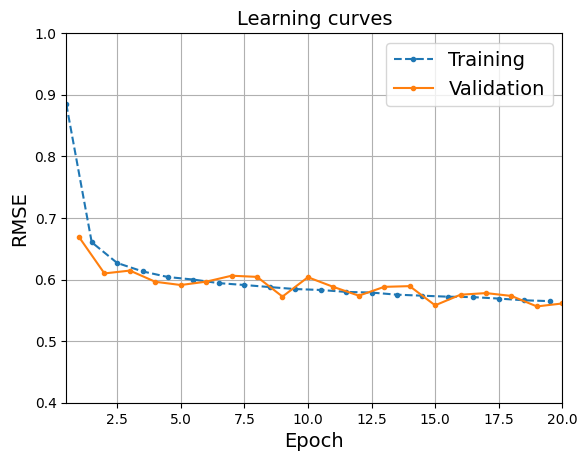

In [222]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader,
               n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 30), nn.ReLU(),
    nn.Linear(30, 1)
)
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

# Since we compute the training metric
plt.plot(np.arange(n_epochs) + 0.5, history["train_metrics"], ".--",
         label="Training")
plt.plot(np.arange(n_epochs) + 1.0, history["valid_metrics"], ".-",
         label="Validation")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid()
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.legend()
plt.show()

# Saving and Loading a PyTorch Model

In [227]:
torch.save(model, "my_model.pt")

In [228]:
loaded_model = torch.load("my_model.pt", weights_only=False)

In [231]:
loaded_model.eval()
pred_model = evaluate_tm(model, valid_loader, rmse)

In [232]:
pred_model

tensor(0.5957, device='cuda:0')

---

### **PyTorch Assignment — Real-World Classification Using MLP**

**Objective:**
Train and evaluate a Multi-Layer Perceptron (MLP) on a real-world classification dataset using proper preprocessing, batching, and evaluation.

---

### **Dataset (choose one)**

Students must use a real tabular dataset:

* Breast Cancer Wisconsin (medical diagnosis)
* Wine dataset (quality classification)

---

### **Task 1 — Data Preparation**

1. Load the dataset.
2. Convert features and labels into PyTorch tensors.
3. Normalize input features using training statistics only.
4. Split into train, validation, and test sets.
5. Create `DataLoader` with mini-batching.

---

### **Task 2 — Build an MLP Classifier**

1. Design an MLP with at least two hidden layers.
2. Use ReLU activation.
3. Output layer must match number of classes.
4. Use **CrossEntropyLoss** (no softmax in the model).

Students must explain why logits are used instead of probabilities.

---

### **Task 3 — Training Loop**

1. Implement mini-batch gradient descent.
2. Track training loss and accuracy per epoch.
3. Reset gradients correctly.
4. Plot loss and accuracy curves.

---

### **Task 4 — Evaluation**

1. Switch to evaluation mode before validation/testing.
2. Compute test accuracy.
3. Generate a confusion matrix.
4. Identify one class the model struggles with and explain why.

---

### **Task 5 — Experimentation**

Change one factor and analyze impact:

* learning rate
* hidden layer size
* number of layers
* optimizer (SGD vs Adam)

---

### **Bonus Insight Task**

1. Train the model **without normalization** and compare results.
2. Train without resetting gradients and explain behavior.
3. Add dropout and observe generalization.

---
